# Emotion prediction

Developing an emotion prediction model is very benifical and has many application. For example, it can be used in advertizments, consultnant, automatic costumer sevices, etc. Fortunetelly, there are audio files dataset were collected from "Mozilla Common Voice" and “Ryerson AudioVisual Database of Emotional Speech and Song". Having such useful data can be used effictivly, and therfore this project will use this data to build a machine learning model that can predict the emotion of a voice.

Datasets contains 20 feature columns and 1 column for denoting the label. The 20 statistical features were extracted through the Frequency Spectrum Analysis using R programming Language. Meanfreq is an example of the features as the same as mode, IQR, etc.

*This dataset can be found on Kaggle :* https://www.kaggle.com/rohitzaman/gender-age-and-emotion-detection-from-voice

Read the dataset and pre-process the features
read in 'cleaned_emotion.csv'

In [1]:
%matplotlib inline

# Numerical libraries
import numpy as np  
from sklearn.preprocessing import OneHotEncoder

# to handle data in form of rows and columns 
import pandas as pd  

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics  

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# Label encoder 
from sklearn.preprocessing import LabelEncoder

# Support Vector Classifier
from sklearn.svm import SVC

# PCA Related
from sklearn.decomposition import PCA

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

# Cross Validation related
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from google.colab import files
uploaded = files.upload()
import io
emotion = pd.read_csv(io.BytesIO(uploaded['cleaned_emotion.csv']))
# Dataset is now stored in a Pandas Dataframe
emotion.head()

Saving cleaned_emotion.csv to cleaned_emotion.csv


,Unnamed: 0,Unnamed: 0.1,X,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0,1,1,0.181338,0.060495,0.187476,0.126197,0.233586,0.107389,0.869088,2.863717,0.923566,0.307220,0.216901,0.181338,0.137742,0.023022,0.271186,0.777344,0.085938,6.226562,6.140625,0.116586,sad
1,1,2,2,0.186897,0.062260,0.195070,0.130847,0.243987,0.113140,1.191767,3.878650,0.918848,0.298859,0.135648,0.186897,0.121811,0.018412,0.271186,0.930339,0.085938,4.000000,3.914062,0.144983,sad
2,2,3,3,0.189102,0.062901,0.204945,0.131422,0.249978,0.118556,1.312690,4.589995,0.919519,0.313069,0.264070,0.189102,0.123758,0.083333,0.262295,0.332386,0.085938,0.625000,0.539062,0.334783,sad
3,4,5,5,0.183036,0.060051,0.174115,0.129949,0.236967,0.107017,1.096409,3.680995,0.921361,0.329295,0.152032,0.183036,0.128469,0.044693,0.258065,1.012019,0.085938,5.468750,5.382812,0.304910,sad
4,5,6,6,0.168793,0.057910,0.156266,0.116783,0.216326,0.099543,1.386837,5.031744,0.926238,0.337047,0.153764,0.168793,0.109720,0.022472,0.235294,0.228795,0.093750,0.750000,0.656250,0.306777,sad


In [2]:
Y = emotion.iloc[:,-1]  # Y is the label that we need to predect 
X = emotion.iloc[:,3:-1]  # X is the feature that we use for predect

# Feature selection

Let us analays the feature and see if we can delete some features that have high corolation.

Now, plot the labels (sad,angry,happy) vs each feature to observe the distribution of each feature of the labels.

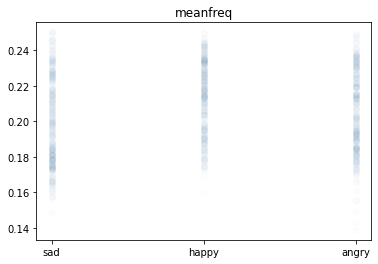

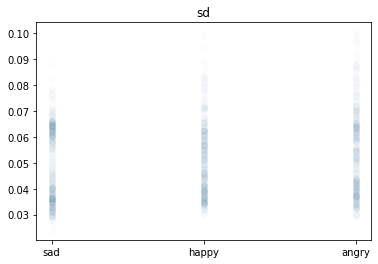

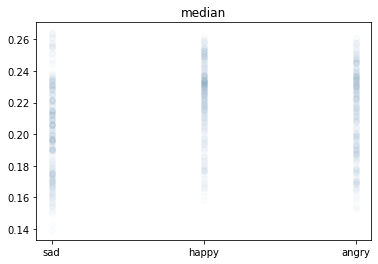

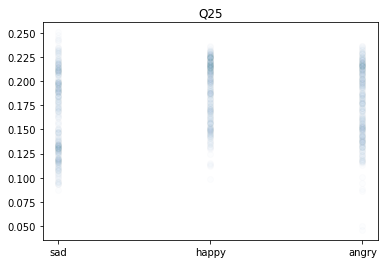

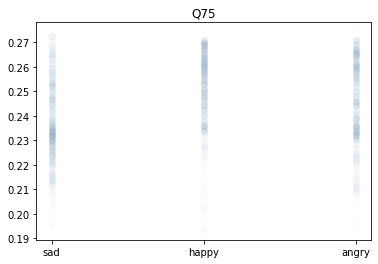

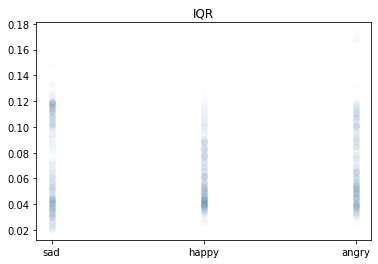

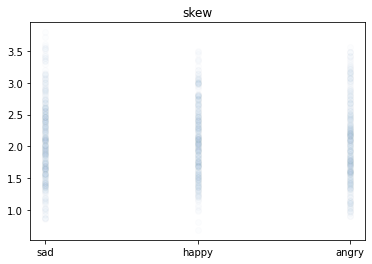

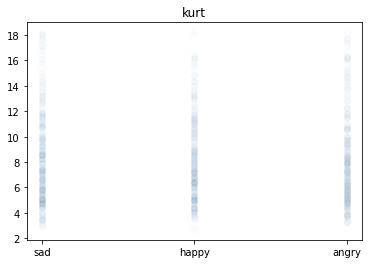

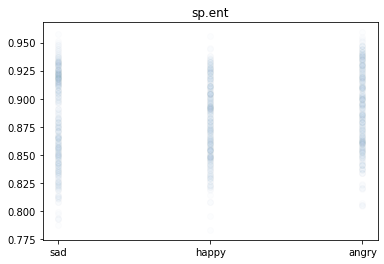

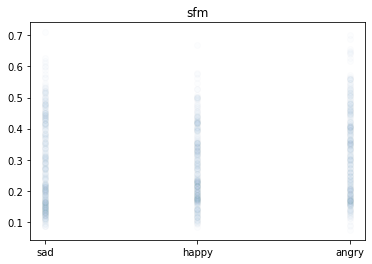

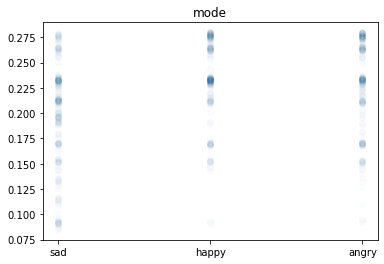

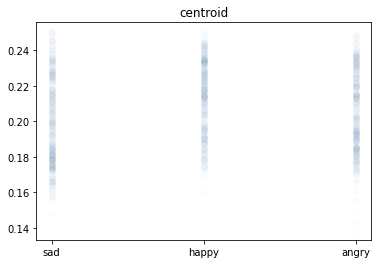

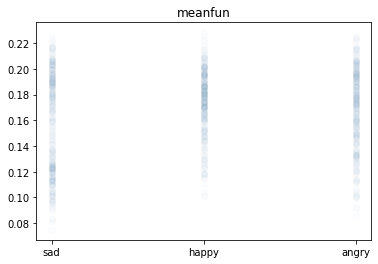

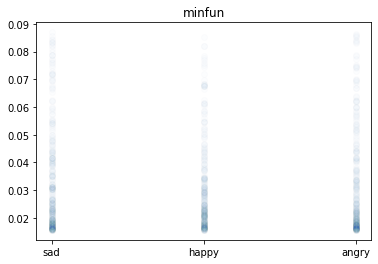

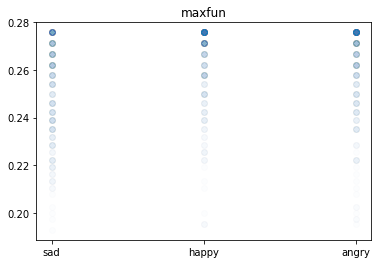

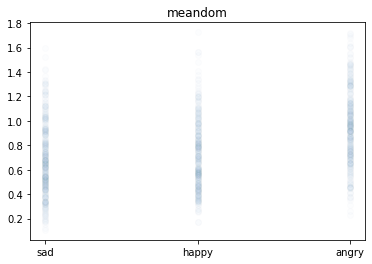

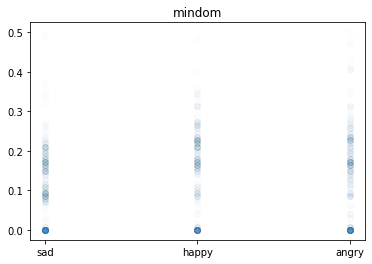

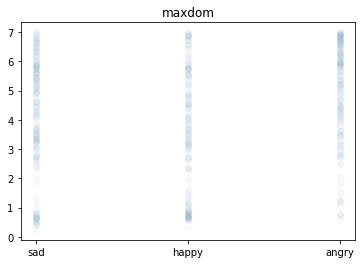

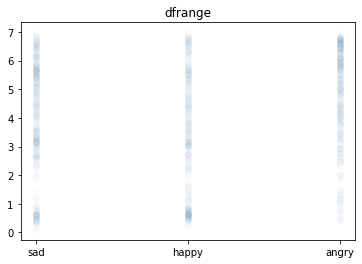

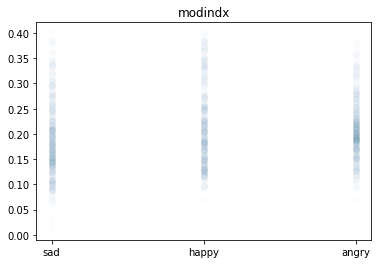

In [3]:
Features = X.columns
alpha = 0.01

for item in Features:  
  plt.figure()
  plt.subplot()
  plt.scatter(Y, X[item], alpha= alpha)
  plt.title(item)

Text(0.5, 1.0, 'mean frequency - The mean frequency is a pitch measure, that assesses the center of the distribution.')

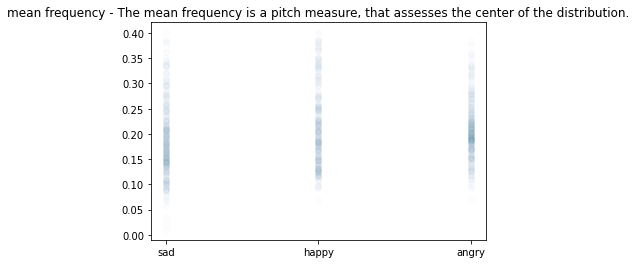

In [4]:
alpha = 0.01 
plt.figure()
plt.subplot()

plt.scatter(Y, X.modindx, alpha= alpha)
plt.title('mean frequency - The mean frequency is a pitch measure, that assesses the center of the distribution.')

Now, let us list the features and do one hot endoding to the labels.

In [5]:
Features = X.columns 


print('The feature count : ',len(Features))    # the number of features we have 
print('list of feature : ',Features)

Y = pd.get_dummies(Y)
Y = Y.to_numpy()

The feature count :  20
list of feature :  Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')


Now let us try to observe and understand the features' distribution more.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


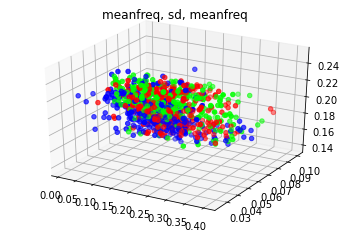

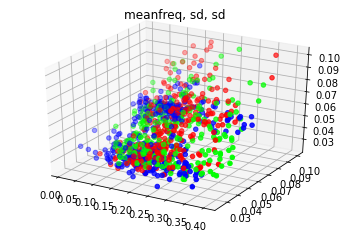

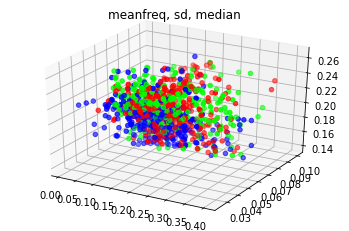

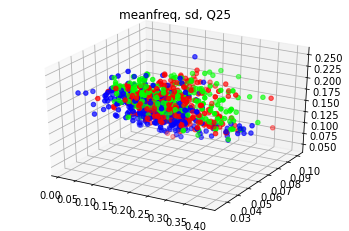

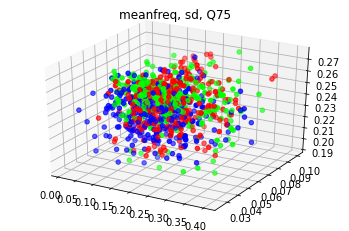

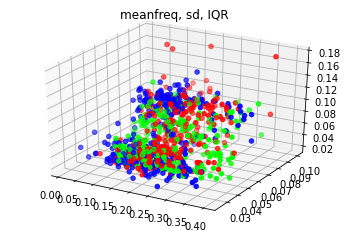

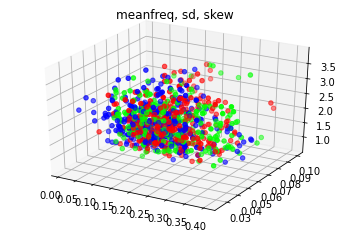

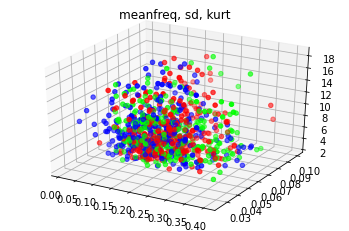

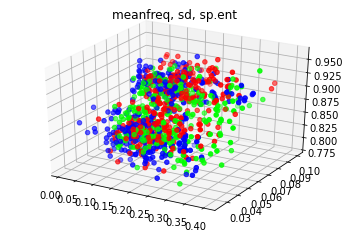

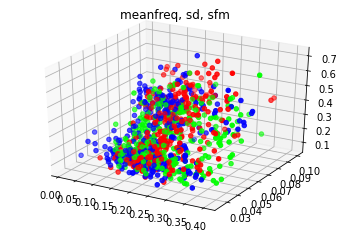

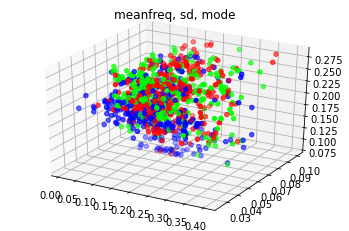

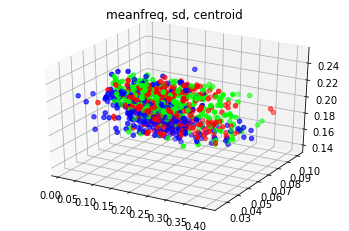

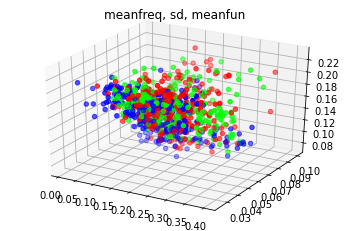

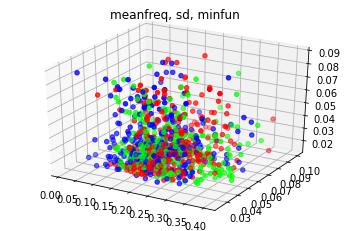

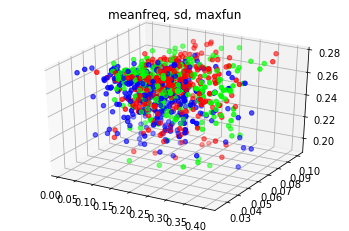

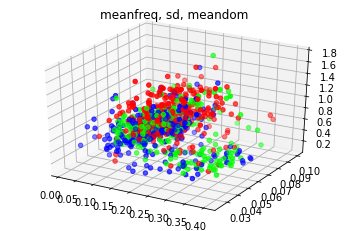

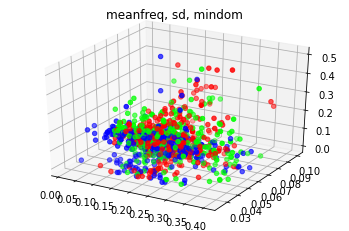

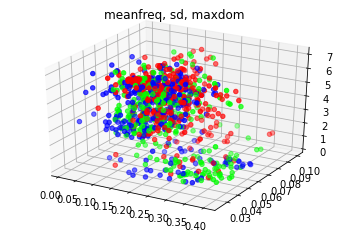

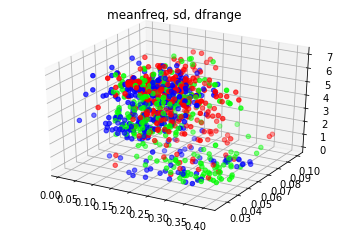

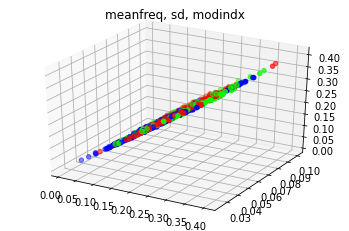

In [6]:
# importing mplot3d toolkits
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

for i in Features:
  fig = plt.figure()
  ax = fig.add_subplot()

  ax = plt.axes(projection='3d')
  ax.scatter(X.modindx, X.sd, X[i],  c=Y, cmap='viridis')

  #ax.scatter(X[i], X.modindx, X.sd , c = Y)
  plt.title('meanfreq, sd, '+i)
  plt.show()

Correlation analysis


In [7]:
# Import those libraries
import pandas as pd
from scipy.stats import pearsonr

for i in Features:
  for j in Features:
    # Apply the pearsonr()
    corr, _ = pearsonr(X[i], X[j])
    print(i + " vs " + j)
    print('Pearsons correlation: %.3f' % corr)




meanfreq vs meanfreq
Pearsons correlation: 1.000
meanfreq vs sd
Pearsons correlation: -0.629
meanfreq vs median
Pearsons correlation: 0.917
meanfreq vs Q25
Pearsons correlation: 0.953
meanfreq vs Q75
Pearsons correlation: 0.768
meanfreq vs IQR
Pearsons correlation: -0.772
meanfreq vs skew
Pearsons correlation: 0.484
meanfreq vs kurt
Pearsons correlation: 0.343
meanfreq vs sp.ent
Pearsons correlation: -0.839
meanfreq vs sfm
Pearsons correlation: -0.755
meanfreq vs mode
Pearsons correlation: 0.616
meanfreq vs centroid
Pearsons correlation: 1.000
meanfreq vs meanfun
Pearsons correlation: 0.723
meanfreq vs minfun
Pearsons correlation: 0.091
meanfreq vs maxfun
Pearsons correlation: 0.532
meanfreq vs meandom
Pearsons correlation: 0.300
meanfreq vs mindom
Pearsons correlation: 0.458
meanfreq vs maxdom
Pearsons correlation: 0.126
meanfreq vs dfrange
Pearsons correlation: 0.103
meanfreq vs modindx
Pearsons correlation: 0.038
sd vs meanfreq
Pearsons correlation: -0.629
sd vs sd
Pearsons correlat

In [8]:
Y = emotion.iloc[:,-1]  # Y is the label that we need to predect 
X = emotion.iloc[:,2:-1]  # X is the feature that we use for predect

we will drop the feature centroid since it is highlt corrolated with mean frequency feature.

In [9]:
drops_list = ['centroid'] 

for feature in drops_list:
	X = X.drop(feature,1)

Checking data balance

Now, plot the count for the gender (male, female) to observe if the data is balanced or not

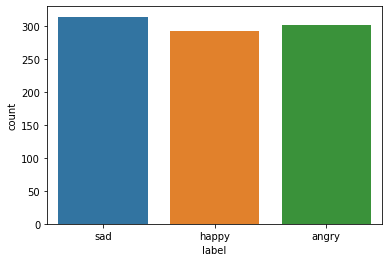

In [10]:
sns.countplot(data=emotion, x = 'label')

It is clear that the data is almost balanced and therfore we do not need  to balance it.

create train_data, train_labels numpy arrays

split train_data, train_labels into 80-20% train_data, train_labels, test_data, test_labels using scitkit-learn's train_test_split

In [11]:
train_data, part_data, train_labels, part_labels = train_test_split(X, Y, test_size =0.2, random_state=0)
val_data, test_data, val_labels, test_labels = train_test_split(part_data, part_labels, test_size =0.5, random_state=0)

Now we have done the feature selcetion and balanced the data(training data). We can now feed the training to the classifier and observe the results.

*Preprocessing*

In [12]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
val_data = scaler.transform(val_data)

In [13]:
train_data.shape , val_data.shape , test_data.shape, train_labels.shape , val_labels.shape , test_labels.shape

((727, 20), (91, 20), (91, 20), (727,), (91,), (91,))

In [14]:
X = train_data
Y = train_labels

# Logestic regression classifier

In [15]:
###############Logestic#############
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, Y)
#Train the model using the training sets

#Predict the response for validation dataset
y_pred = clf.predict(val_data)

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy on validation:",metrics.accuracy_score(val_labels, y_pred))
############################################################
from sklearn.metrics import classification_report
print(classification_report(val_labels, clf.predict(val_data)))

Accuracy on validation: 0.6373626373626373
              precision    recall  f1-score   support

       angry       0.74      0.51      0.61        39
       happy       0.59      0.69      0.63        29
         sad       0.60      0.78      0.68        23

    accuracy                           0.64        91
   macro avg       0.64      0.66      0.64        91
weighted avg       0.66      0.64      0.63        91



Feature expansion

We can see that the data is underfitting, so we will try to use poly kernal trick to do feature expansion.

# **SVM classifier**

we will diffrent kernals on the validation set, we will try RBF, sigmoid, poly and linear.

***1-linear***

In [16]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report

#Create a svm Classifier
clf = svm.SVC(kernel='linear', gamma='auto') # Linear Kernel

#Train the model using the training sets
clf.fit(X, Y)

#Predict the response for training data
y_pred = clf.predict(val_data)
# Model Accuracy: how often is the classifier correct?
print("Accuracy on validation data:",metrics.accuracy_score(val_labels, y_pred))


print(classification_report(val_labels, clf.predict(val_data)))

Accuracy on validation data: 0.6703296703296703
              precision    recall  f1-score   support

       angry       0.75      0.62      0.68        39
       happy       0.66      0.66      0.66        29
         sad       0.60      0.78      0.68        23

    accuracy                           0.67        91
   macro avg       0.67      0.68      0.67        91
weighted avg       0.68      0.67      0.67        91



***2-RBF***

In [17]:
clf = svm.SVC(kernel='rbf', gamma='auto') 
clf.fit(X, Y)
y_pred = clf.predict(val_data)
print("Accuracy on validation data:",metrics.accuracy_score(val_labels, y_pred))
print(classification_report(val_labels, clf.predict(val_data)))

Accuracy on validation data: 0.5494505494505495
              precision    recall  f1-score   support

       angry       0.65      0.44      0.52        39
       happy       0.52      0.59      0.55        29
         sad       0.50      0.70      0.58        23

    accuracy                           0.55        91
   macro avg       0.56      0.57      0.55        91
weighted avg       0.57      0.55      0.55        91



***3-simoid***

In [18]:
clf = svm.SVC(kernel='sigmoid', gamma='auto') 
clf.fit(X, Y)
y_pred = clf.predict(val_data)
print("Accuracy on validation data:",metrics.accuracy_score(val_labels, y_pred))
print(classification_report(val_labels, clf.predict(val_data)))

Accuracy on validation data: 0.4835164835164835
              precision    recall  f1-score   support

       angry       0.61      0.49      0.54        39
       happy       0.47      0.24      0.32        29
         sad       0.40      0.78      0.53        23

    accuracy                           0.48        91
   macro avg       0.49      0.50      0.46        91
weighted avg       0.51      0.48      0.47        91



4- Poly

In [19]:
clf = svm.SVC(kernel='poly',degree=2) # poly Kernel
clf.fit(X, Y)
y_pred = clf.predict(X)
print("Accuracy on training data with degree 2:",metrics.accuracy_score(Y, y_pred))
y_pred = clf.predict(val_data)
print("Accuracy on validation data with degree 2:",metrics.accuracy_score(val_labels, y_pred))
print(classification_report(val_labels, clf.predict(val_data)))

clf = svm.SVC(kernel='poly',degree=3) # poly Kernel
clf.fit(X, Y)
y_pred = clf.predict(X)
print("Accuracy on training data with degree 3:",metrics.accuracy_score(Y, y_pred))
y_pred = clf.predict(val_data)
print("Accuracy on validation data with degree 3:",metrics.accuracy_score(val_labels, y_pred))
print(classification_report(val_labels, clf.predict(val_data)))

clf = svm.SVC(kernel='poly',degree=4) # poly Kernel
clf.fit(X, Y)
y_pred = clf.predict(X)
print("Accuracy on training data with degree 4:",metrics.accuracy_score(Y, y_pred))
y_pred = clf.predict(val_data)
print("Accuracy on validation data with degree 4:",metrics.accuracy_score(val_labels, y_pred))
print(classification_report(val_labels, clf.predict(val_data)))

clf = svm.SVC(kernel='poly',degree=5) # poly Kernel
clf.fit(X, Y)
y_pred = clf.predict(X)
print("Accuracy on training data with degree 5:",metrics.accuracy_score(Y, y_pred))
y_pred = clf.predict(val_data)
print("Accuracy on validation data with degree 5:",metrics.accuracy_score(val_labels, y_pred))
print(classification_report(val_labels, clf.predict(val_data)))

clf = svm.SVC(kernel='poly',degree=6) # poly Kernel
clf.fit(X, Y)
y_pred = clf.predict(X)
print("Accuracy on training data with degree 6:",metrics.accuracy_score(Y, y_pred))
y_pred = clf.predict(val_data)
print("Accuracy on validation data with degree 6:",metrics.accuracy_score(val_labels, y_pred))
print(classification_report(val_labels, clf.predict(val_data)))

Accuracy on training data with degree 2: 0.6299862448418156
Accuracy on validation data with degree 2: 0.4945054945054945
              precision    recall  f1-score   support

       angry       0.48      0.28      0.35        39
       happy       0.54      0.72      0.62        29
         sad       0.45      0.57      0.50        23

    accuracy                           0.49        91
   macro avg       0.49      0.52      0.49        91
weighted avg       0.49      0.49      0.48        91

Accuracy on training data with degree 3: 0.7221458046767538
Accuracy on validation data with degree 3: 0.5054945054945055
              precision    recall  f1-score   support

       angry       0.64      0.36      0.46        39
       happy       0.46      0.72      0.56        29
         sad       0.48      0.48      0.48        23

    accuracy                           0.51        91
   macro avg       0.52      0.52      0.50        91
weighted avg       0.54      0.51      0.50      

It is clear that after tunning the kernal hyperparameter that Linear gives the best performance on validation set which was 67%

# Bagging 

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# training and hyper-parameter tuning

abc =BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators = 500,random_state = 8)

model = abc.fit(X, Y)

#Predict the response for test dataset
y_pred = model.predict(val_data)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(val_labels, y_pred))

Accuracy: 0.6263736263736264


# AdaBoost

In [21]:
from sklearn.ensemble import AdaBoostClassifier
# training and hyper-parameter tuning

abc =AdaBoostClassifier(n_estimators=500,random_state=7)

model = abc.fit(X, Y)

#Predict the response for test dataset
y_pred = model.predict(val_data)


# Model Accuracy, how often is the classifier correct?
print("AsaBoost Accuracy on validation set:",metrics.accuracy_score(val_labels, y_pred))

AsaBoost Accuracy on validation set: 0.6483516483516484


# Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
# training and hyper-parameter tuning
abc =RandomForestClassifier(max_depth=35, random_state=0)

model = abc.fit(X, Y)

#Predict the response for test dataset
y_pred = model.predict(val_data)

# Model Accuracy, how often is the classifier correct?
print("Accuracy with Random Forest Classifier on validation set:",metrics.accuracy_score(val_labels, y_pred))

Accuracy with Random Forest Classifier on validation set: 0.6483516483516484


# **K-Neighbors Classifier**

For K-Neighbors we have K as a hyperparameter we need to try. Therefore, we will try 3,5,7,9 with ball tree, KD tree, and brute. 

1- K=3

In [23]:
#  KNeighborsClassifier '
from time import perf_counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf1=KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree').fit(X,Y)
print("Accuracy in ball tree for validtion data with K=3:")
print(accuracy_score(val_labels,clf1.predict(val_data)))
print("################################################")

clf2=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree').fit(X,Y)
print("Accuracy in KD-tree for validtion data data with K=3:")
print(accuracy_score(val_labels,clf2.predict(val_data)))
print("################################################")

clf2=KNeighborsClassifier(n_neighbors=3, algorithm='brute').fit(X,Y)
print("Accuracy in brute for validtion data data with K=3:")
print(accuracy_score(val_labels,clf2.predict(val_data)))


Accuracy in ball tree for validtion data with K=3:
0.5054945054945055
################################################
Accuracy in KD-tree for validtion data data with K=3:
0.5054945054945055
################################################
Accuracy in brute for validtion data data with K=3:
0.5054945054945055


***# 2- K=5***

In [24]:
clf1=KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree').fit(X,Y)
print("Accuracy in ball tree for validtion data with K=5:")
print(accuracy_score(val_labels,clf1.predict(val_data)))
print("################################################")

clf2=KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree').fit(X,Y)
print("Accuracy in KD-tree for validtion data data with K=5:")
print(accuracy_score(val_labels,clf2.predict(val_data)))
print("################################################")

clf2=KNeighborsClassifier(n_neighbors=5, algorithm='brute').fit(X,Y)
print("Accuracy in brute for validtion data data with K=5:")
print(accuracy_score(val_labels,clf2.predict(val_data)))

Accuracy in ball tree for validtion data with K=5:
0.5274725274725275
################################################
Accuracy in KD-tree for validtion data data with K=5:
0.5274725274725275
################################################
Accuracy in brute for validtion data data with K=5:
0.5274725274725275


***3- K=7***

In [25]:
clf1=KNeighborsClassifier(n_neighbors=7, algorithm='ball_tree').fit(X,Y)
print("Accuracy in ball tree for validtion data with K=7:")
print(accuracy_score(val_labels,clf1.predict(val_data)))
print("################################################")

clf2=KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree').fit(X,Y)
print("Accuracy in KD-tree for validtion data data with K=7:")
print(accuracy_score(val_labels,clf2.predict(val_data)))
print("################################################")

clf2=KNeighborsClassifier(n_neighbors=7, algorithm='brute').fit(X,Y)
print("Accuracy in brute for validtion data data with K=7:")
print(accuracy_score(val_labels,clf2.predict(val_data)))

Accuracy in ball tree for validtion data with K=7:
0.5054945054945055
################################################
Accuracy in KD-tree for validtion data data with K=7:
0.5054945054945055
################################################
Accuracy in brute for validtion data data with K=7:
0.5054945054945055


***4-K=9***

In [26]:
clf1=KNeighborsClassifier(n_neighbors=9, algorithm='ball_tree').fit(X,Y)
print("Accuracy in ball tree for validtion data with K=9:")
print(accuracy_score(val_labels,clf1.predict(val_data)))
print("################################################")

clf2=KNeighborsClassifier(n_neighbors=9, algorithm='kd_tree').fit(X,Y)
print("Accuracy in KD-tree for validtion data data with K=9:")
print(accuracy_score(val_labels,clf2.predict(val_data)))
print("################################################")

clf2=KNeighborsClassifier(n_neighbors=9, algorithm='brute').fit(X,Y)
print("Accuracy in brute for validtion data data with K=9:")
print(accuracy_score(val_labels,clf2.predict(val_data)))

Accuracy in ball tree for validtion data with K=9:
0.5054945054945055
################################################
Accuracy in KD-tree for validtion data data with K=9:
0.5054945054945055
################################################
Accuracy in brute for validtion data data with K=9:
0.5054945054945055


We can see that K=5 gives the best results on the validatoin set.

Confusion matrix for the best calssifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


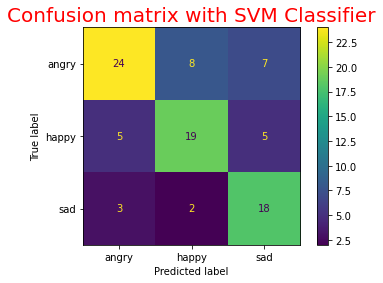

In [28]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

clf =svm.SVC(kernel='linear', gamma='auto') # Linear Kernel

model = clf.fit(train_data, train_labels)

plot_confusion_matrix(clf, val_data, val_labels) 
plt.title(label="Confusion matrix with SVM Classifier",
          fontsize=20,
          color="red") 
plt.show()

After all, we have tried three classifiers with diffrent hyperparamaters and the best one that perfomed the highest accuracy was SVM with linear kernal. Therfore, it will be used to predict the test dataset.

In [29]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear', gamma='auto') # Linear Kernel

#Train the model using the training sets
clf.fit(X, Y)

#Predict the response for training data
y_pred = clf.predict(test_data)
# Model Accuracy: how often is the classifier correct?
print("Accuracy on validation data:",metrics.accuracy_score(test_labels, y_pred))

print(classification_report(test_labels, clf.predict(test_data)))

Accuracy on validation data: 0.5824175824175825
              precision    recall  f1-score   support

       angry       0.62      0.50      0.55        32
       happy       0.50      0.58      0.54        26
         sad       0.63      0.67      0.65        33

    accuracy                           0.58        91
   macro avg       0.58      0.58      0.58        91
weighted avg       0.59      0.58      0.58        91



**Finally, the accuracy for the test data is 58.24%.**